In [231]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv("/home/atharva/Desktop/car_data.csv")

In [7]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


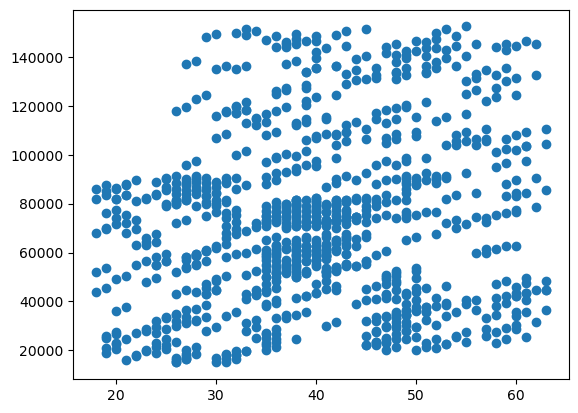

In [11]:
plt.scatter(y=df.AnnualSalary,x=df.Age)

In [12]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [13]:
le=LabelEncoder()

In [14]:
df.Gender=le.fit_transform(df.Gender)

In [15]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [119]:
x=df.drop(['Purchased','User ID'],axis=1)
y=df.Purchased

In [120]:
print(x)

     Gender  Age  AnnualSalary
0         1   35         20000
1         1   40         43500
2         1   49         74000
3         1   40        107500
4         1   25         79000
..      ...  ...           ...
995       1   38         59000
996       0   47         23500
997       0   28        138500
998       0   48        134000
999       0   44         73500

[1000 rows x 3 columns]


In [121]:
xt,xtt,yt,ytt=train_test_split(x,y,test_size=0.2,random_state=654)

In [123]:
xt

,Gender,Age,AnnualSalary
426,0,34,25000
893,0,58,123500
23,0,41,61500
528,0,23,66000
427,1,29,33500
...,...,...,...
742,1,39,122000
738,1,41,58500
768,0,53,143000
351,0,51,89500


#Decision Tree

In [205]:
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',ccp_alpha=0.001)

In [206]:
model=dtc.fit(xt,yt)

In [207]:
print(model.get_n_leaves())

105


In [208]:
pred=model.predict(xtt)

In [209]:
model.get_depth()

14

In [232]:
acc=accuracy_score(pred,ytt)
score=roc_auc_score(pred,ytt)
print(confusion_matrix(pred,ytt))

[[107  11]
 [ 11  71]]


In [220]:

from sklearn.tree import plot_tree

In [230]:
print(float(round(score*100)),'%')
print(float(round(acc*100)),'%')

89.0 %
89.0 %


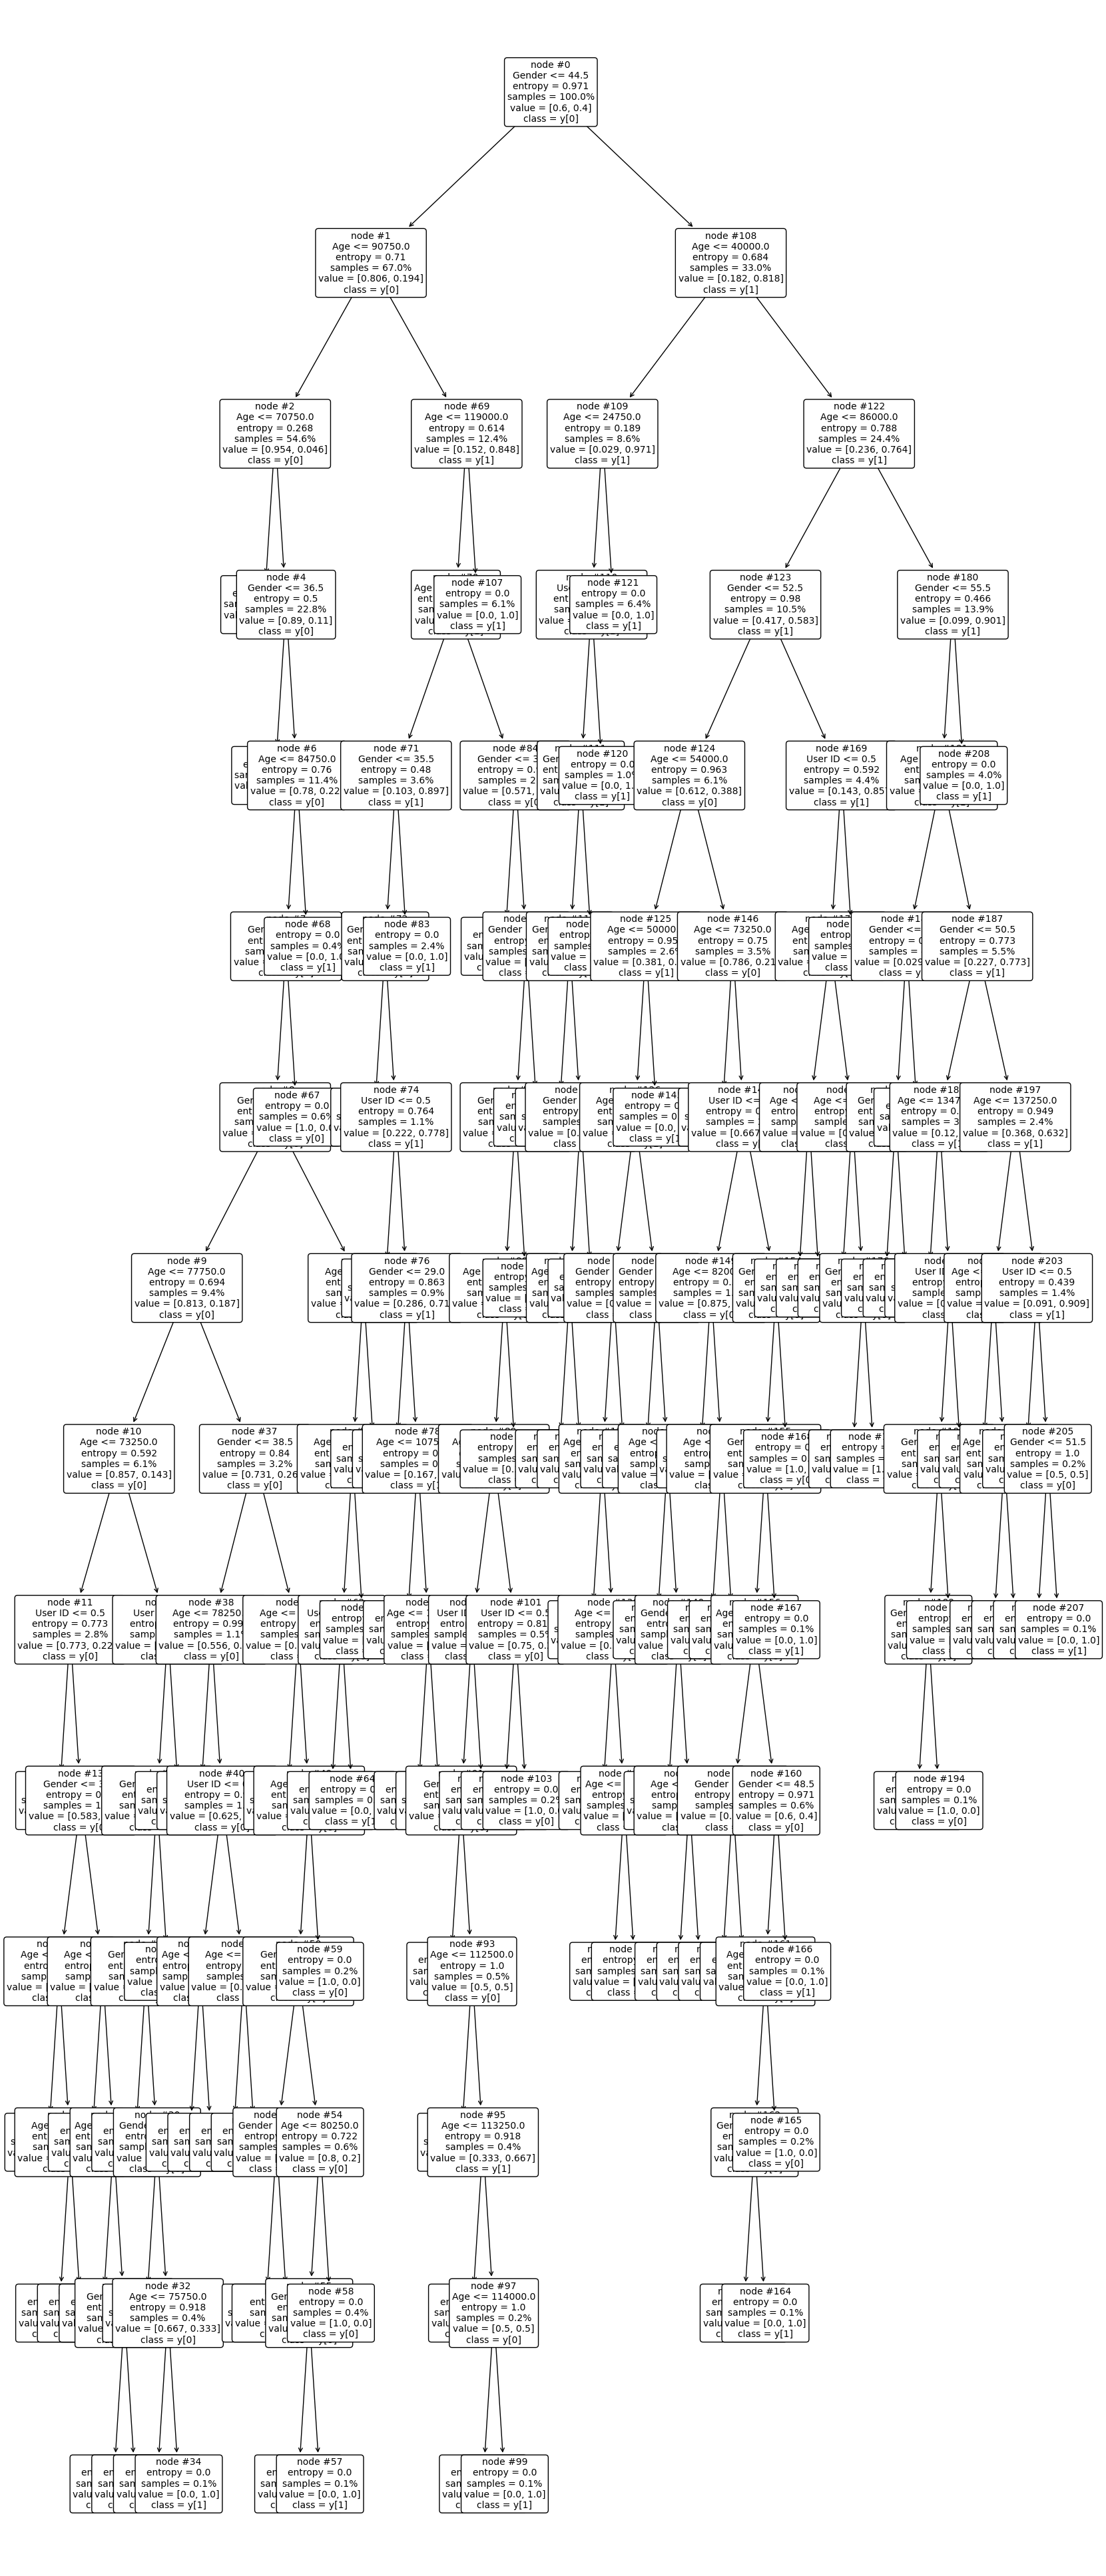

In [213]:
plt.figure(figsize=(20,50))
plot_tree(model,rounded=True,
          proportion=True,
          node_ids=True,
          fontsize=10,
          class_names=True,
          feature_names=df.columns)
plt.show()

In [214]:
 values=pd.DataFrame({'Gender':[1,0,1,1,0,0,1,1],
                     'Age':[32,53,26,44,24,27,30,43],
                     'AnnualSalary':[25884,45034,180977,46432,100837,45643,130533,65434]})

In [215]:
pp=model.predict(values)
print(pp)

[0 0 1 0 0 0 1 0]


In [188]:
df.Purchased.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<Axes: xlabel='AnnualSalary', ylabel='Count'>

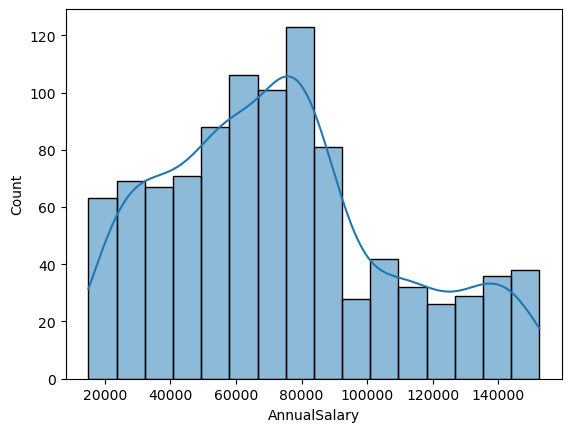

In [189]:
sns.histplot(df.AnnualSalary,kde=True)

##Random Forest


In [237]:
from sklearn.ensemble  import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [245]:
param_grid={'n_estimators':[20,30,40,50],
            'max_depth':[25,50,100,150]}

In [256]:
rfc=RandomForestClassifier(
                           criterion='gini',
                           max_features='sqrt',
                           n_jobs=-1,
                           random_state=352)

In [257]:
grid_search=GridSearchCV(rfc,
                         param_grid,
                         n_jobs=-1,
                         scoring='accuracy',
                         cv=8)

In [258]:
model=grid_search.fit(xt,yt)

In [259]:
print(grid_search.best_params_)

{'max_depth': 25, 'n_estimators': 40}


In [260]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=25, n_estimators=40, n_jobs=-1,
                       random_state=352)


In [261]:
print(grid_search.best_score_)

0.88625


In [264]:
pre=grid_search.predict(xtt)

In [265]:
ac=accuracy_score(pre,ytt)

In [313]:
rfct=RandomForestClassifier(n_estimators=40,
                           max_depth=30,
                           criterion='log_loss',
                           max_features='sqrt',
                           n_jobs=-1,
                           random_state=352)

In [314]:
model=rfct.fit(xt,yt)

In [315]:
pre=model.predict(xtt)

In [316]:
ac=accuracy_score(pre,ytt)

In [317]:
print(ac)

0.9
